<a href="https://colab.research.google.com/github/SaurabhSSB/statistics_basics/blob/main/src/practical_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## Measure of Central Tendency

###1. Mean

###2. Median

###3. Mode

In [1]:
age_data=[23,24,32,45,12,43,67,45,32,56,32,120]

In [2]:
import numpy as np
mean= np.mean(age_data)
median= np.median(age_data)
print(f"Mean of the data is {mean}.")
print(f"Median of the data is {median}.")

Mean of the data is 44.25.
Median of the data is 37.5.


In [3]:
import statistics
print(statistics.mean(age_data))
print(statistics.median(age_data))

44.25
37.5


In [4]:
mode= statistics.mode(age_data)
print(f"Mode fo the data is {mode}.")

Mode fo the data is 32.


<Axes: >

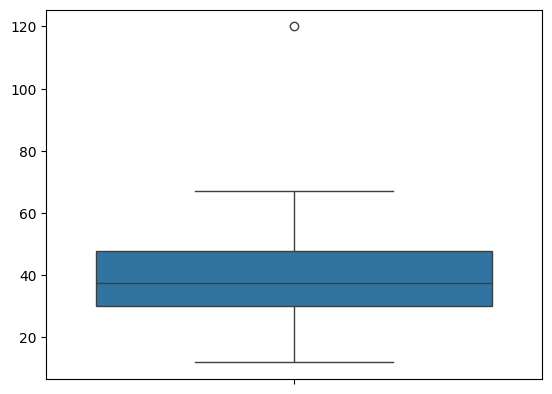

In [5]:
import seaborn as sns
sns.boxplot(age_data)

In [6]:
# Five Number Summary
q1,q3= np.percentile(age_data,[25,75])
print(f"q1= {q1}, q3= {q3}")

q1= 30.0, q3= 47.75


In [7]:
# Check Outliers [Lower fence and Higher fence]
IQR= q3-q1
lower_fence= q1 - 1.5 * IQR
higher_fence= q3 + 1.5 * IQR
print(f"Lower_fence: {lower_fence}\nHigher_fence: {higher_fence}")

Lower_fence: 3.375
Higher_fence: 74.375


## Measure of Dispersion
### 1. Variance

### 2. Standard Deviation

In [8]:
variance= statistics.variance(age_data)
print(variance)

795.2954545454545


In [9]:
np.var(age_data,axis=0) # For Population Variance

729.0208333333334

In [10]:
statistics.pvariance(age_data) # For Population Variance

729.0208333333334

In [11]:
import math
std= math.sqrt(variance)
print(f"Standard Deviation is: {std}")
print(f"Standard Deviation of populations is: {math.sqrt(statistics.pvariance(age_data))}")

Standard Deviation is: 28.2009832194811
Standard Deviation of populations is: 27.000385799712813


## Histograms and PDF

<Axes: ylabel='Count'>

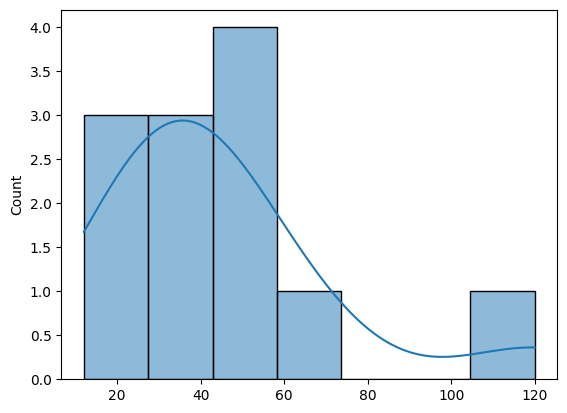

In [12]:
import seaborn as sns
sns.histplot(age_data,kde= True)

In [13]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Count'>

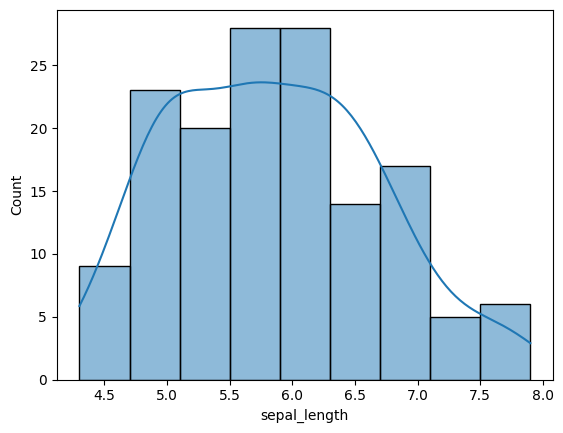

In [14]:
sns.histplot(df['sepal_length'],kde=True)

<Axes: xlabel='sepal_width', ylabel='Count'>

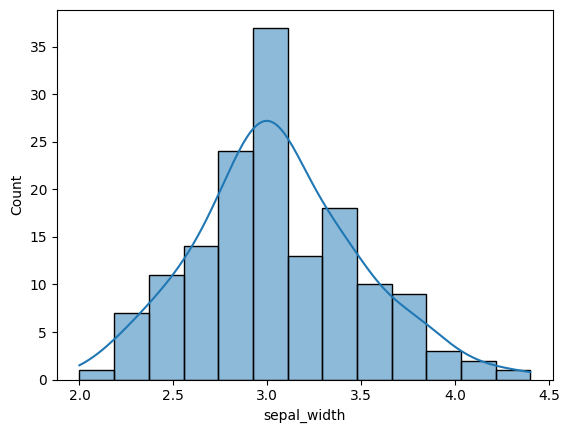

In [15]:
sns.histplot(df['sepal_width'],kde=True)

<Axes: xlabel='petal_length', ylabel='Count'>

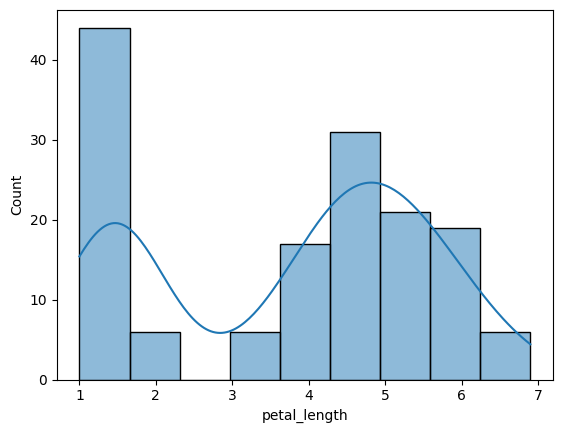

In [16]:
sns.histplot(df['petal_length'],kde=True)

<Axes: xlabel='petal_width', ylabel='Count'>

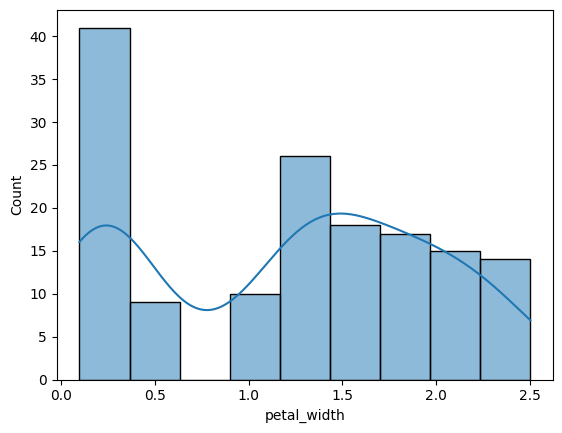

In [17]:
sns.histplot(df['petal_width'],kde=True)

In [18]:
# Normal Distribution
x= np.random.normal(0.5,0.2,1000) ## 0.5 is mean and 0.2 is std

<Axes: ylabel='Count'>

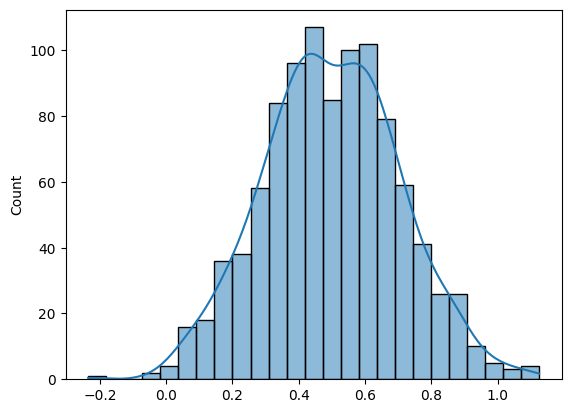

In [19]:
sns.histplot(x,kde= True)

<Axes: ylabel='Count'>

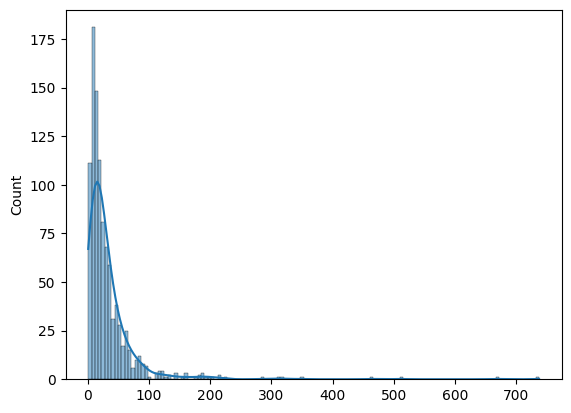

In [20]:
# Log Normal Distribution
x_log= np.random.lognormal(3,1,1000)
sns.histplot(x_log, kde=True)

<Axes: ylabel='Count'>

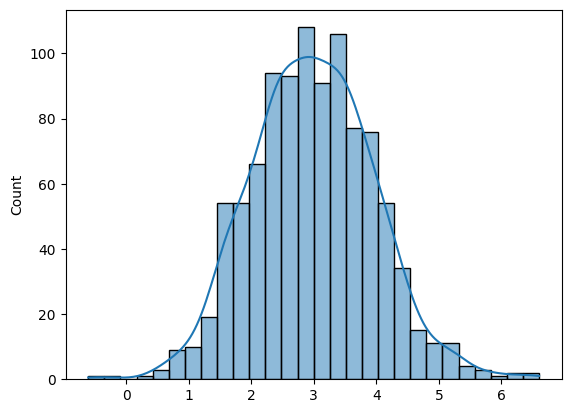

In [21]:
sns.histplot(np.log(x_log),kde= True)

## Checking for normal distribution

In [22]:
#### Checking if the feature is guassian or normal distributed
#### Q-Q plot
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
def plot_data(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(sample,dist='norm',plot=pylab)
    plt.show()

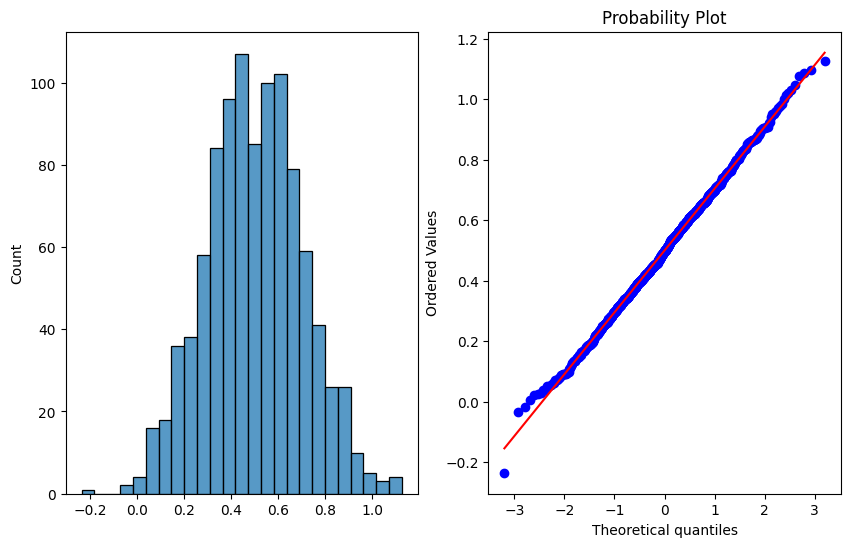

In [23]:
plot_data(x)

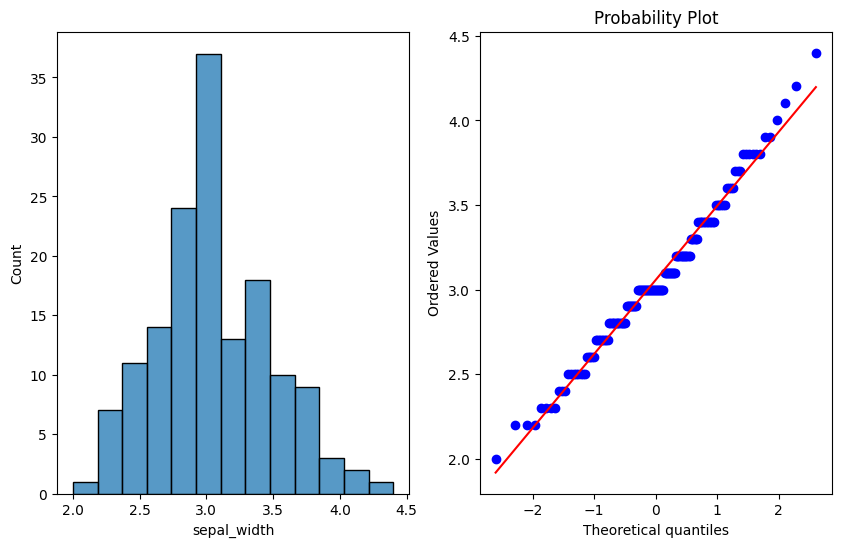

In [24]:
plot_data(df["sepal_width"])

In [25]:
#### If you want to check whether feature is log normal distributed
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
def log_plot_data(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(np.log(sample),dist='norm',plot=pylab)
    plt.show()


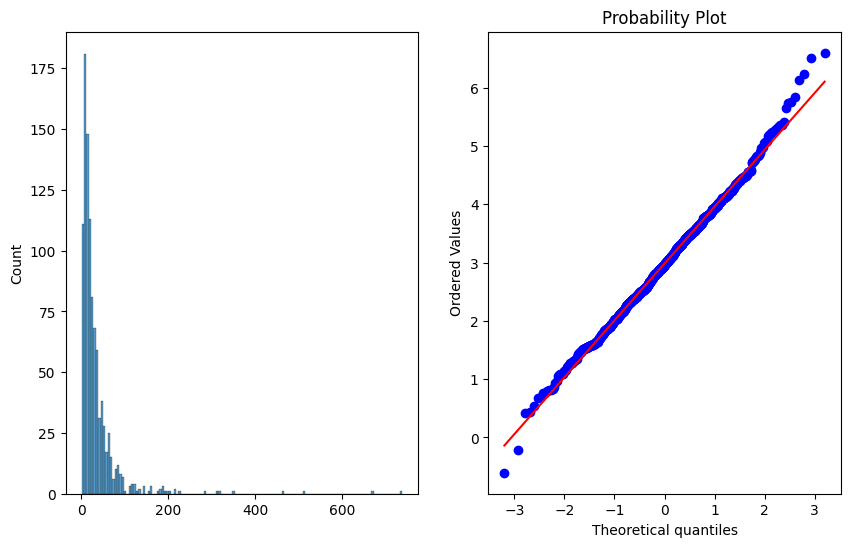

In [26]:
log_plot_data(x_log)

## Pearson and Spearman Rank Correlation

In [27]:
import pandas as pd

In [28]:
f= sns.load_dataset('tips')
f.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [29]:
f.corr(numeric_only=True)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


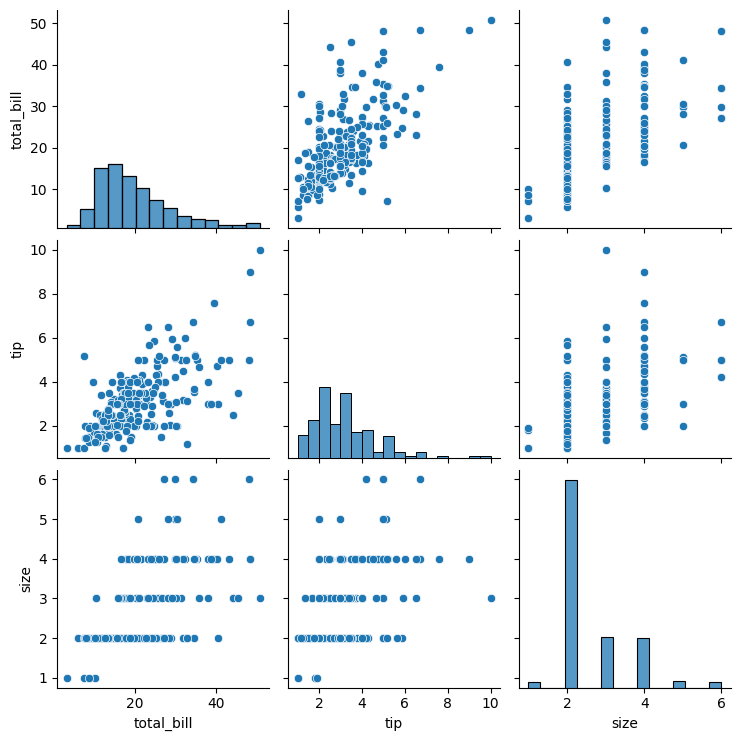

In [32]:
sns.pairplot(f)

In [30]:
df= sns.load_dataset('healthexp')
df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


In [31]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.corr()

,Year,Spending_USD,Life_Expectancy,Country_France,Country_Germany,Country_Great Britain,Country_Japan,Country_USA
Year,1.000000,0.826273,0.902175,0.131510,-0.063841,0.049841,-0.067323,-0.067323
Spending_USD,0.826273,1.000000,0.579430,0.044680,-0.026321,-0.148707,-0.202795,0.349072
Life_Expectancy,0.902175,0.579430,1.000000,0.193807,-0.170978,-0.038070,0.240615,-0.302170
Country_France,0.131510,0.044680,0.193807,1.000000,-0.180799,-0.165106,-0.183007,-0.183007
Country_Germany,-0.063841,-0.026321,-0.170978,-0.180799,1.000000,-0.203840,-0.225940,-0.225940
Country_Great Britain,0.049841,-0.148707,-0.038070,-0.165106,-0.203840,1.000000,-0.206329,-0.206329
Country_Japan,-0.067323,-0.202795,0.240615,-0.183007,-0.225940,-0.206329,1.000000,-0.228700
Country_USA,-0.067323,0.349072,-0.302170,-0.183007,-0.225940,-0.206329,-0.228700,1.000000
